# <u>Matrix Plots.

- ***Matrix plots allows us to plot data as color-encoded matrices and can also be used to indicate clusters within the data*** (later in the machine learning section we will learn how to formally cluster data).

- A cluster means a group of data points (rows, columns, or both) that are similar to each other based on some measure (e.g., correlation, distance, similarity metric).

Let's begin by exploring seaborn's heatmap and clutermap:

---

# <u>Imports.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

---

# <u>Load 'flight' and 'tips' dataset / DataFrame.

In [2]:
flights = sns.load_dataset('flights')

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


***<u>NOTE:</u> The flight data set primarily just shows the number of passengers that flew in a given month of a given year.***

---

# 1) <u>Heatmap.

- ***Heatmap allows us to plot data as color-encoded matrices (or DataFrame) where values are represented by colors and can also be used to indicate clusters within the data.***

- In order for a heatmap to work properly, the data should already be in a matrix form, the sns.heatmap function basically just colors it in for us.

- Meaning, The index name and the column name should match up so that the cell value actually indicates something that is relevant to both of those names in a matrix that we are to plot as a Heatmap.

- ***Syntax: sns.heatmap(df, annot = bool, cmap, linecolor = 'color', linewidths = float)***

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


- <u>NOTE:

    - Let's pick the first value i.e 16.99 from the tips DataFrame.
    - It corresponds to the total_bill column and row 0.
    - In order to plot a Heatmap from the above DataFrame(matrix), we need to have same labels or variables for a cell value on both the column and the row.
    - We can do that through many methods usually through a pivot table or trying to get correlation data.
    - We'll go ahead and do correlation data first.

In [7]:
# Matrix form for correlation data

tips.corr(numeric_only = True)

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


### corr()

- See Pandas Groupby notebook to understand this line of code: numeric_only = True

- ***Correlation tells us how strongly two variables are related and in which direction.***

            Values range from -1 to +1:
            +1 → perfect positive relationship (as one increases, the other always increases).
            -1 → perfect negative relationship (as one increases, the other always decreases).
            0 → no linear relationship.
    
    - df.corr(numeric_only = True) looks at all numeric columns in the DataFrame.

    - Then it computes the pairwise correlation between each pair of numeric columns.

    - The result is a correlation matrix (not grouped, just column vs. column).

    - We have to use numeric_only = True argument since tips DataFrame has non-numeric (categorical) columns such as 'sex', 'smoker' etc and when pandas tries to compute correlations, it tries to convert them into numbers but fails.

    - What groupby().agg() does:

            With groupby, you split the DataFrame into subgroups based on some categorical column(s).

            Then you apply an aggregation function (mean, sum, correlation, etc.) within each group.

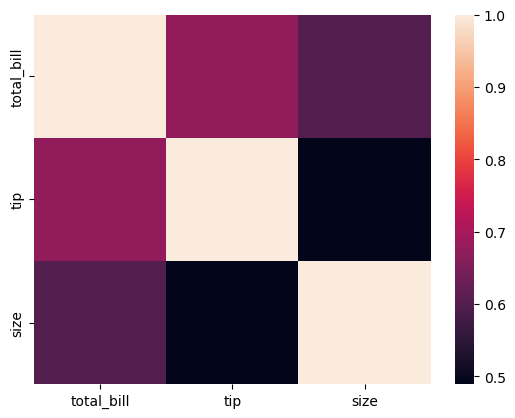

In [8]:
sns.heatmap(tips.corr(numeric_only = True))

plt.show()

- <u>NOTE:

    - What a heatmap really does is, it colors in those values(data points) based on some sort of gradient scale.

    - And that way if we have a very large correlation DataFrame or some other matrix form of data we can easily tell what the values are relative to each other using a Heatmap.

    - And that's the main primary use for a matrix plot.

***annot = bool parameter:***

    - Stands for annotation.
    - If True, writes the data value in each cell.

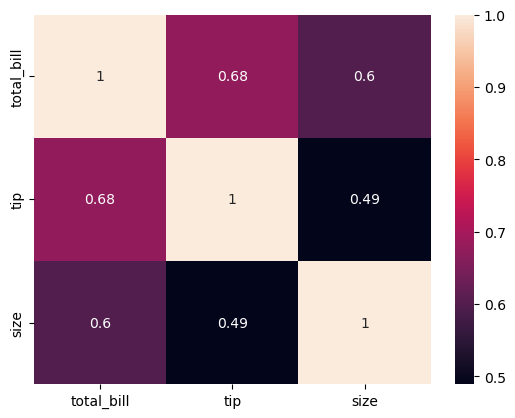

In [9]:
sns.heatmap(tips.corr(numeric_only = True), annot = True)

plt.show()

***cmap parameter:***

    - matplotlib colormap name or object, or list of colors.
    - We will go over colormap and the options later on.

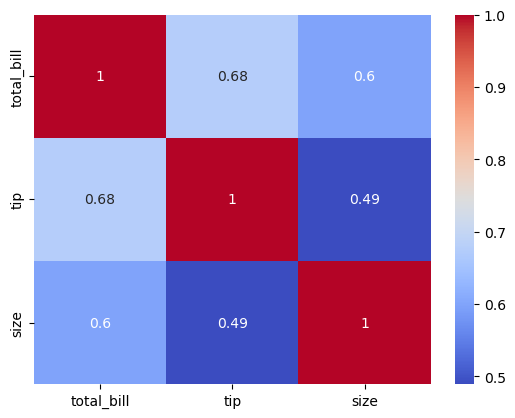

In [10]:
sns.heatmap(tips.corr(numeric_only = True), annot = True, cmap = 'coolwarm')

plt.show()

### Or for the flights data:

In [11]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


***First we need to convert the flights DataFrame in the matrix form:***

***This time let's do it with pivot_table() method:***

Read about Pivot Tables in Pandas Notebook: Operations

In [12]:
# Setting 'month' as index.
# Setting 'year' as columns.
# values = Column or list of columns to aggregate.
# index and columns parameter can take in a list of column names.

flights.pivot_table(values = 'passengers', index = 'month', columns = 'year')

C:\Users\user1\AppData\Local\Temp\ipykernel_8116\482539152.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  flights.pivot_table(values = 'passengers', index = 'month', columns = 'year')


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


- <u>NOTE: Fix for Warning

    - In the flights dataset from seaborn, month is categorical (Jan, Feb, …, Dec), which triggers this.
    - month → categorical
    - year → numeric (int)
    - If we want all 12 months, even if some have no data → observed = False.
    - If we want only the months present in the data → observed = True.

In [13]:
# Setting 'month' as index.
# Setting 'year' as columns.
# values = Column or list of columns to aggregate.
# index and columns parameter can take in a list of column names.

flights.pivot_table(values = 'passengers', index = 'month', columns = 'year', observed = False)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


***Now, we can visualize this data using sns.heatmap() :***

In [14]:
pvflights = flights.pivot_table(values = 'passengers', index = 'month', columns = 'year', observed = False)

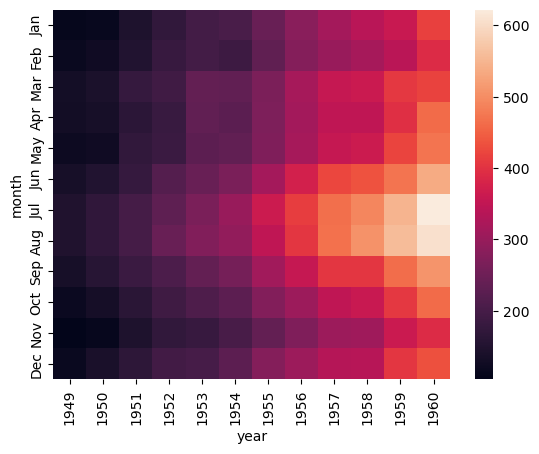

In [15]:
sns.heatmap(pvflights)

plt.show()

- <u>NOTE:

    - And now we can see the data based on a color gradient in a lot clearer format.

    - So we can easily tell which month of which year had the most flights and it makes sense that gradually as the years go further or forward in time we get more flights.
 
    - We can also see that the most popular months for travel are usually June, July, and August, during the summer.

***cmap = 'magma' parameter:***

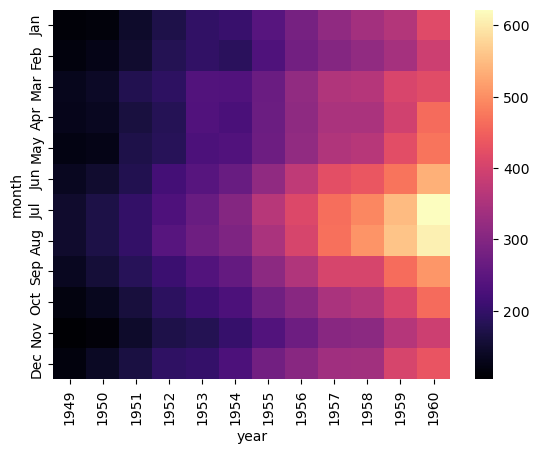

In [16]:
sns.heatmap(pvflights, cmap = 'magma')

plt.show()

***linecolor parameter:***

    Color of the lines that will divide each cell.('color')

***linewidths parameter:***

    Width of the lines that will divide each cell.(float)

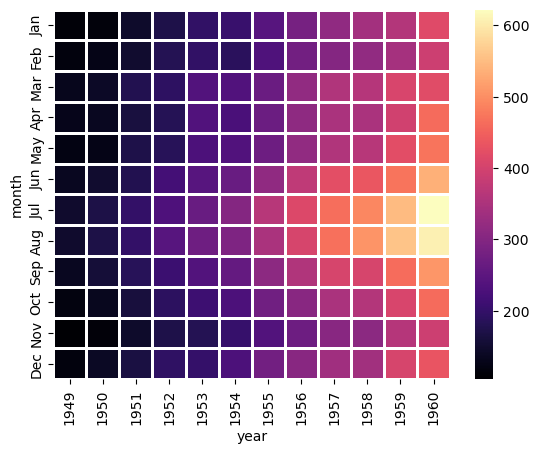

In [17]:
sns.heatmap(pvflights, cmap = 'magma', linecolor = 'white', linewidths = 1)

plt.show()

- <u>NOTE:

    - With linecolor and linewidths parameter the heatmap is a lot easier to read.

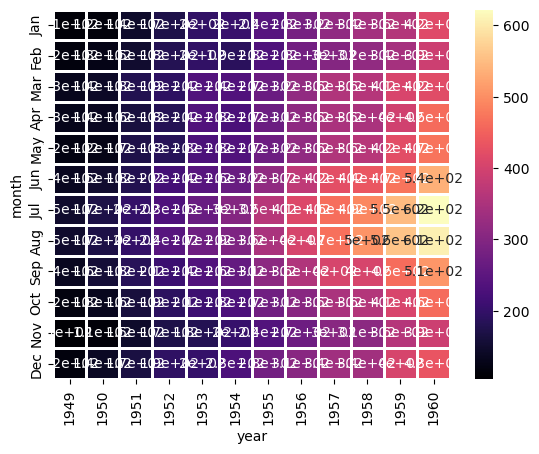

In [18]:
# annot = True
# Overlaps.


sns.heatmap(pvflights, cmap = 'magma', linecolor = 'white', linewidths = 1, annot = True)

plt.show()

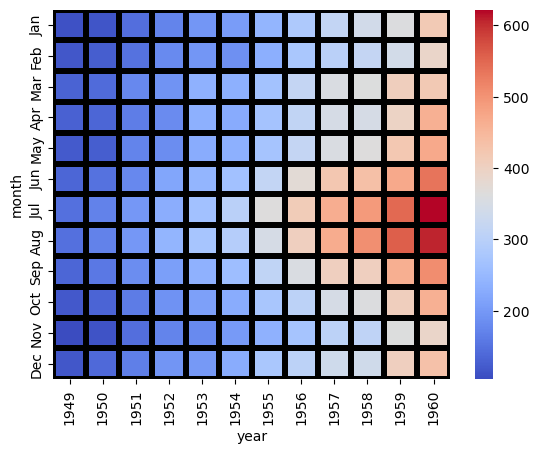

In [28]:
sns.heatmap(pvflights, cmap = 'coolwarm', linecolor = 'black', linewidths = 3)

plt.show()

---

# <u>2) clustermap

- ***The clustermap uses hierarchal clustering to produce a clustered version of the heatmap.***

- ***Syntax: sns.clustermap(df, cmap, standard_scale = int, linecolor = 'color', linewidths = float, annot = bool)***

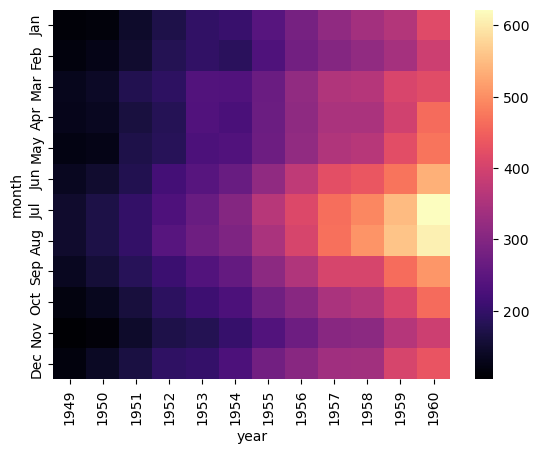

In [20]:
# Heatmap of pvflights:

sns.heatmap(pvflights, cmap = 'magma')

plt.show()

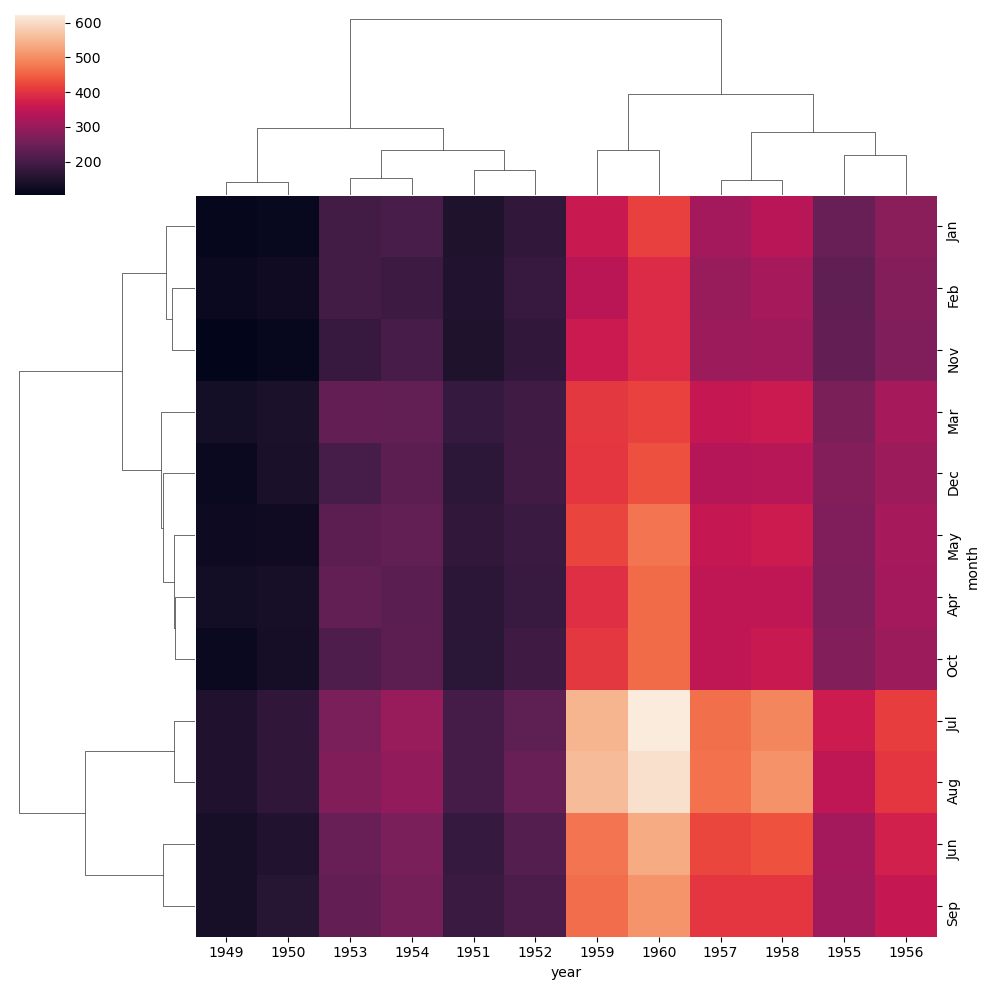

In [21]:
# clustermap of pvflights:

sns.clustermap(pvflights)

plt.show()

- Notice now how the years and months are no longer in order, instead they are grouped by similarity(clustered) in value (passenger count). That means we can begin to infer things from this plot, such as August and July being similar (makes sense, since they are both summer travel months) and 1959 and 1960 are very similar to each other.

- It basically clusters information to try to show columns and rows that are similar to each other.

- And we can see the different levels of the hierarchy of the clusters based off of the tree diagrams, both on the y axis and the x axis.

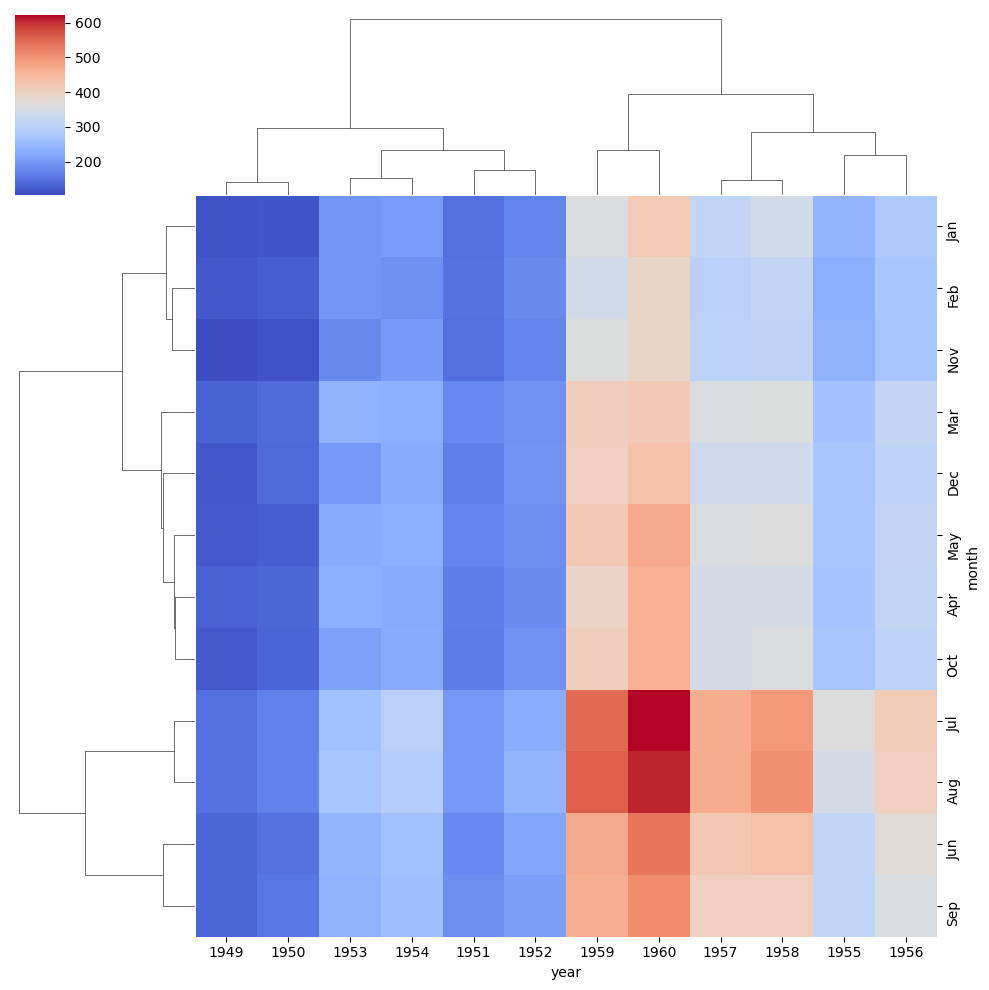

In [22]:
# More options to get the information a little clearer.

sns.clustermap(pvflights, cmap = 'coolwarm')

plt.show()

- ***standard_scale = int***

    - Standard_scale is used to normalize (rescale) the data before clustering and plotting.
    - If we set standard_scale = 0, then each column is rescaled so that its values range from 0 to 1.
    - If we set standard_scale = 1, then each row is rescaled so that its values range from 0 to 1.

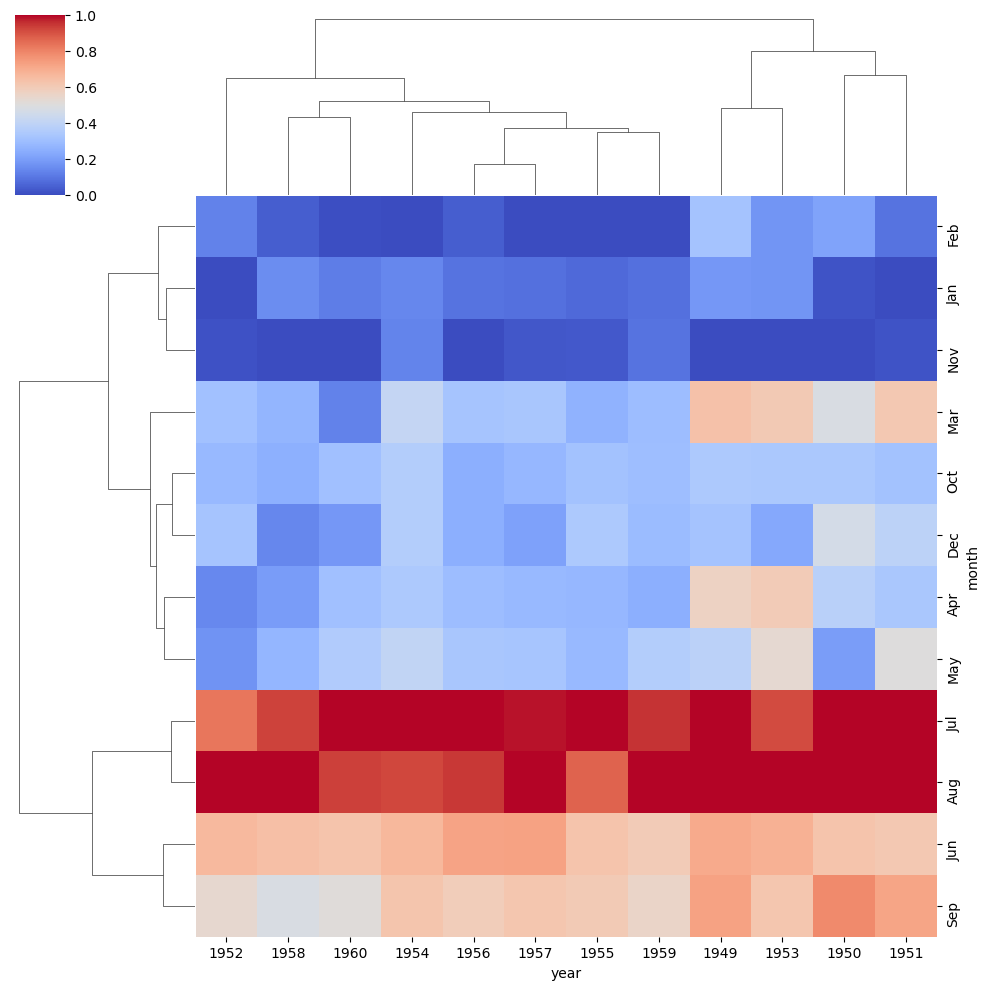

In [23]:
# More options to get the information a little clearer like normalization.

sns.clustermap(pvflights, cmap = 'coolwarm', standard_scale = 1)

plt.show()

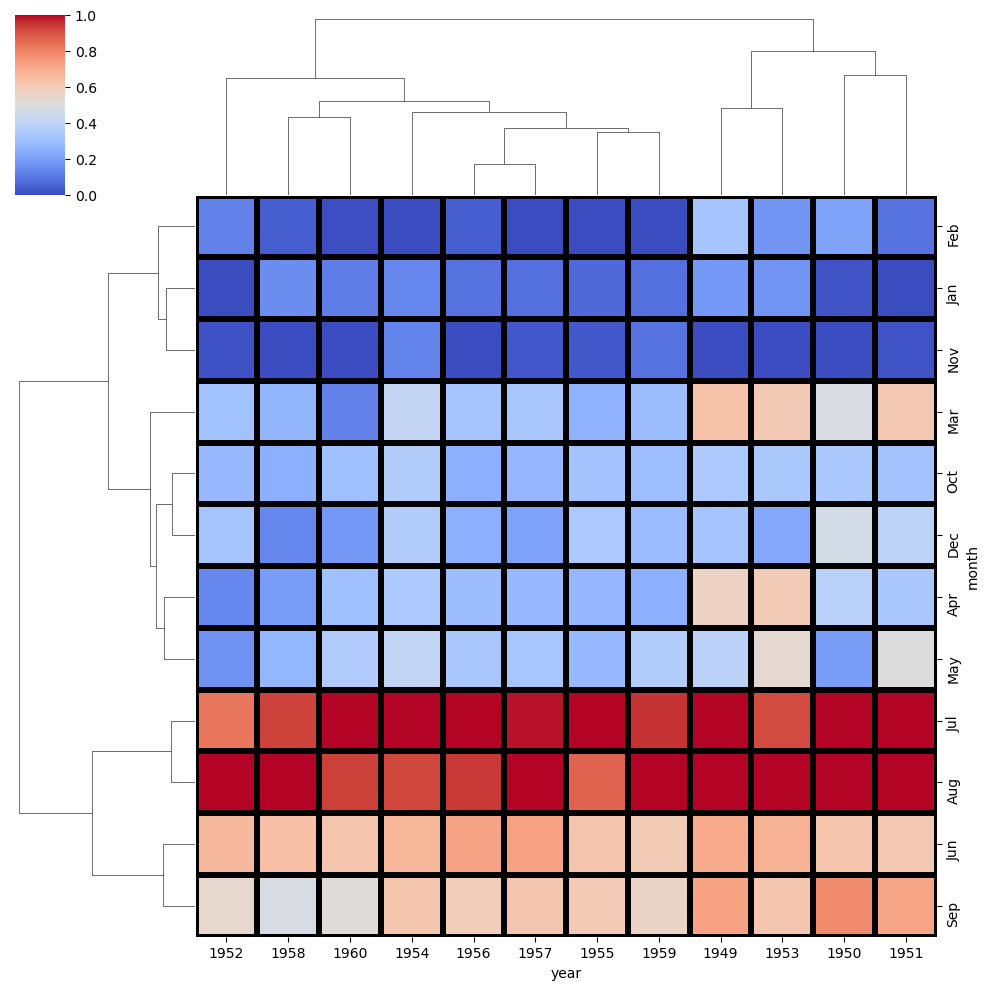

In [24]:
# linecolor and linewidths arguments.

sns.clustermap(pvflights, cmap = 'coolwarm', standard_scale = 1, linecolor = 'black', linewidths = 3)

plt.show()

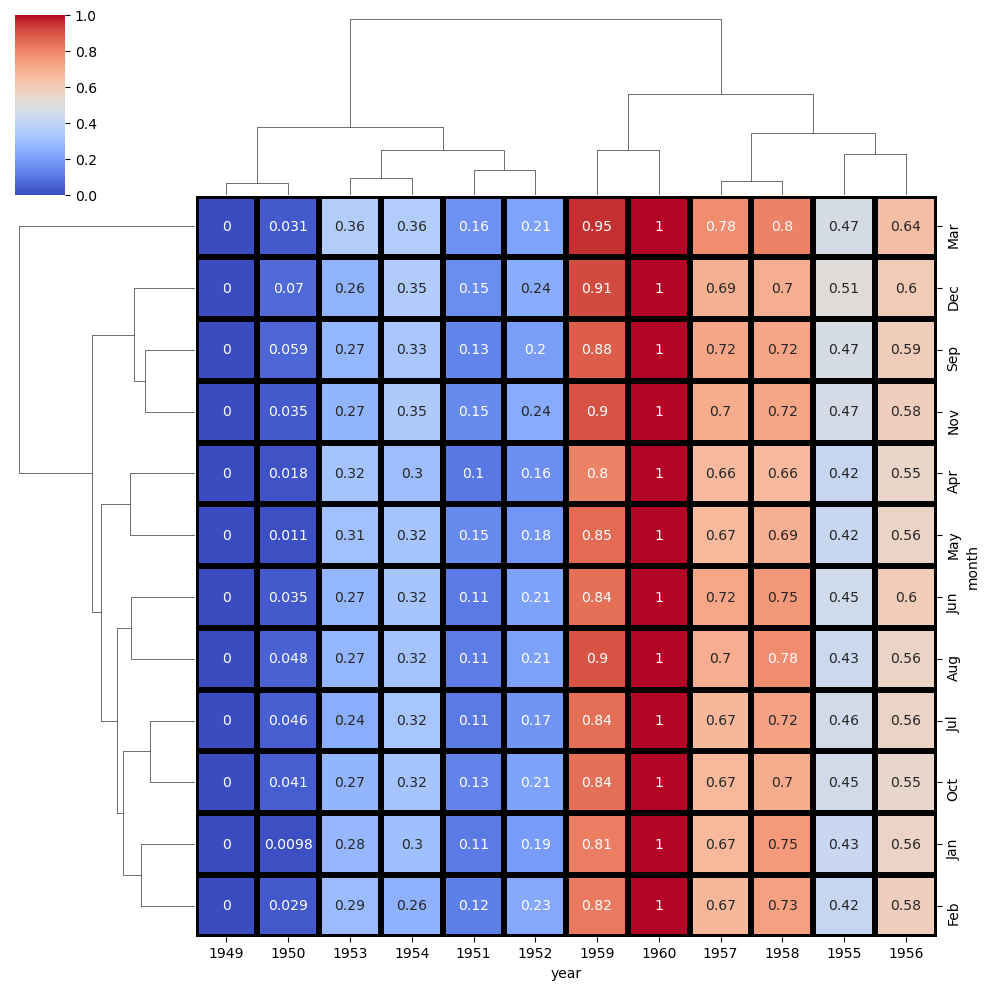

In [25]:
# annot = True is quite useful when we have standard_scale set to 1 or 0.

sns.clustermap(pvflights, cmap = 'coolwarm', standard_scale = 0, linecolor = 'black', linewidths = 3, annot = True)

plt.show()

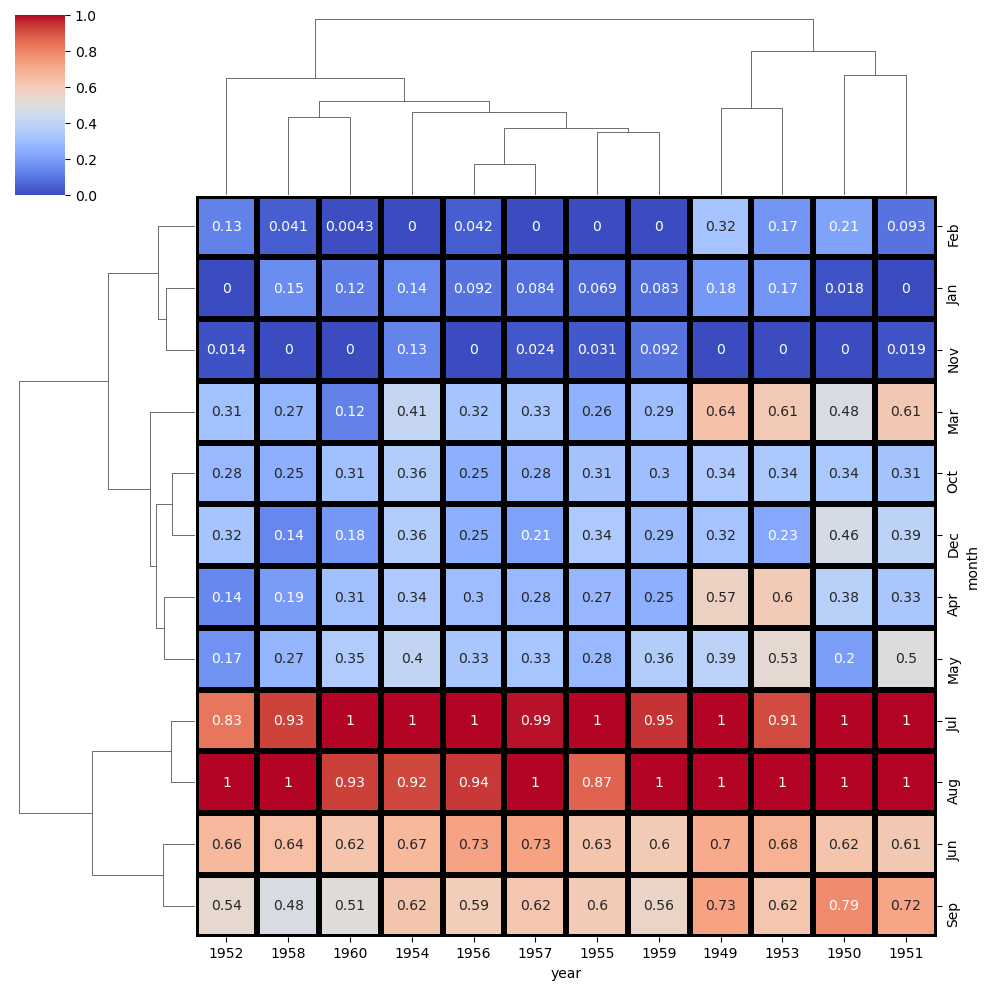

In [26]:
# annot = True is quite useful when we have standard_scale set to 1 or 0.

sns.clustermap(pvflights, cmap = 'coolwarm', standard_scale = 1, linecolor = 'black', linewidths = 3, annot = True)

plt.show()

- <u>NOTE:

    - When we learn Machine learning clustering algorithms later on, we can better understand what's actually going on with the mathematics behind these methods.
    - For now think of it as an interesting method to just infer a little more information from a normal heatmap.

---